# Clean up the mol2 file 
<b style="font-size:20px">With xxxxxx.mol2 as input:<br>
It automatically outputs the xxxxxx_clean.mol2 and xxxxxx.sdf;</b>
<br>
<code><b style="font-size:20px">molfile = "./PaIVKLkS/PaIVKLkS_SEEDdock.mol2"  # absolute path</b>
<b style="color:green;font-size:20px">Doana.utils.clean_mol2(molfile)</b></code>

<h1>PLIF Generator</h1>

In [2]:
# import Doana
from Doana import analysis


parmdic = {
  'reflig'     : "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/tmp_Sampling_target_clean.mol2",
  'profile'    : "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/tmp_Sampling_target.pdb",
  
  'resultmols' : "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.mol2",
  'resultdat'  : "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.dat",
  # This should be a new file
  'outpkl'     : "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.pkl",  

  # Should use a python iterable object to define its indexes 
  'onlymols'   : list(range(1,3000)),
}



# Calculate the overlapping index separately. 
wrapper = analysis.PLIFGen_Dock(parmdic)
# wrapper.clean_mol2(parmdic["resultmols"]); 
wrapper.gen() 

# Generate extra calculations 
OIdic = wrapper.calc_OI(1.5, printrecords=False)

wrapper.savedata()


Loading receptor PDB structure: /home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/tmp_Sampling_target.pdb


/home/yzhang/miniconda3/envs/prolif_new/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.53it/s]


Reference ligand interactions: ligand             UNL1                                              \
protein         ILE49.A     GLY50.A             CYS51.A     GLY52.A   
interaction Hydrophobic Hydrophobic HBDonor Hydrophobic Hydrophobic   
Frame                                                                 
0                  True        True    True        True        True   

ligand                                                                  \
protein         ILE74.A    ALA107.A    MET108.A               PHE125.A   
interaction Hydrophobic Hydrophobic Hydrophobic HBAcceptor Hydrophobic   
Frame                                                                    
0                  True        True        True       True        True   

ligand                                                                  
protein                   PHE127.A    PRO128.A    ASP129.A    ILE141.A  
interaction PiStacking Hydrophobic Hydrophobic Hydrophobic Hydrophobic  
Frame                  

2999 molecules put to the library supplier (from /home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.mol2)


100%|█████████████████████████████████████████████████████████████████████████████| 2999/2999 [00:09<00:00, 303.87it/s]


Saved the fingerprint to file: /home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.pkl


<h1>PLIF Reader</h1>

/home/yzhang/miniconda3/envs/prolif_new/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data set 1
0 GLY50.A_HBDonor 892  | 1 CYS51.A_HBDonor 99  | 2 TYR53.A_HBAcceptor 50
3 TYR53.A_PiStacking 17  | 4 GLY55.A_HBDonor 2  | 5 GLU73.A_HBDonor 113
6 GLU73.A_Cationic 78  | 7 ARG85.A_HBAcceptor 2  | 8 ASN106.A_HBDonor 14
9 ASN106.A_HBAcceptor 6  | 10 ALA107.A_HBAcceptor 10  | 11 MET108.A_HBAcceptor 584
12 LYS109.A_HBAcceptor 3  | 13 PHE125.A_PiStacking 882  | 14 LEU126.A_HBDonor 77
15 PHE127.A_HBDonor 157  | 16 PHE127.A_CationPi 1  | 17 PHE127.A_PiStacking 479
18 PRO128.A_HBDonor 3  | 19 ASP129.A_HBDonor 167  | 20 ASP129.A_HBAcceptor 53
21 ASP129.A_Cationic 475  | 22 HID131.A_PiStacking 90  | 23 ARG134.A_HBDonor 1
24 TRP139.A_HBAcceptor 74  | 25 TRP139.A_PiStacking 133  | 26 THR164.A_HBAcceptor 2
27 ASP165.A_HBDonor 5  | 28 ASP165.A_Cationic 1  | 29 SER203.A_HBDonor 24
30 GLU205.A_HBAcceptor 16  | 31 Rank	 2999  | 32 seed_total	 2999
33 seed_vdw	 2999  | 34 pos_id	 2999  | 35 nha	 2999
36 date	 2999  | 37 source_campaign	 2999  | 38 can_smile	 2999
39 OI_avg	 2999  | 40 OI_ref	

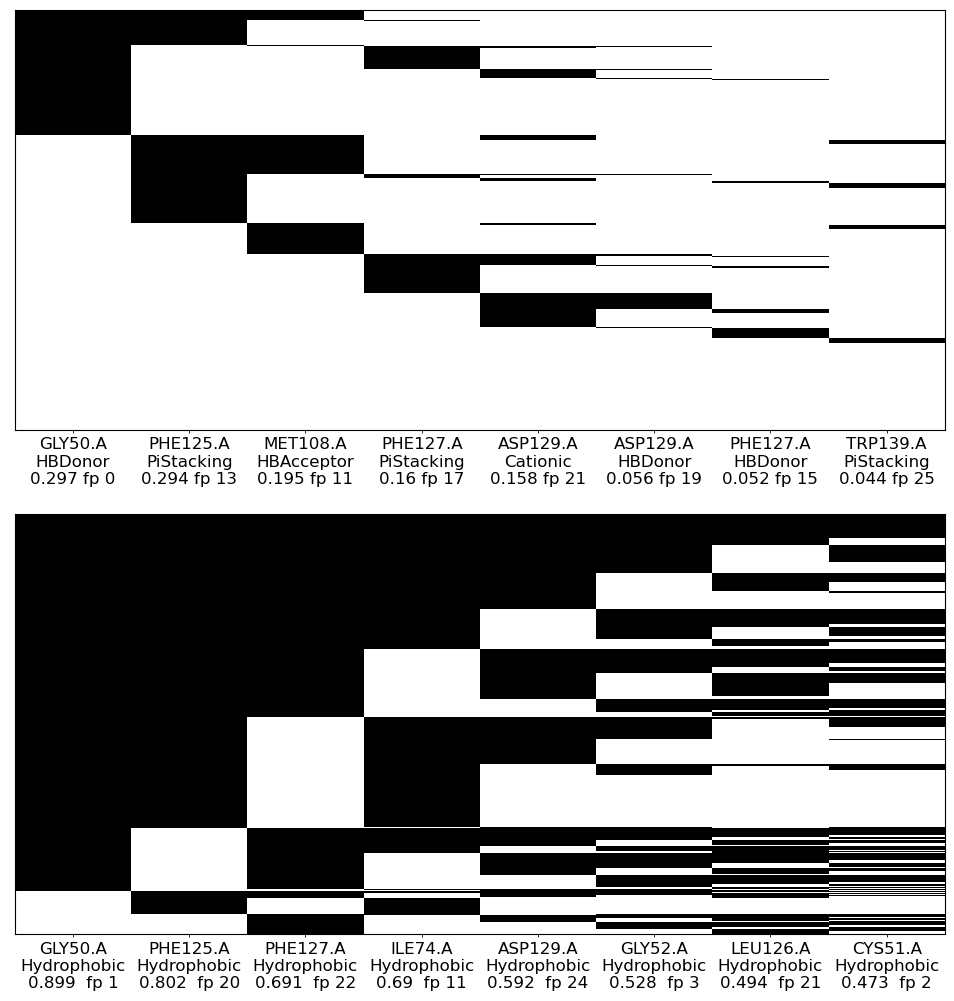

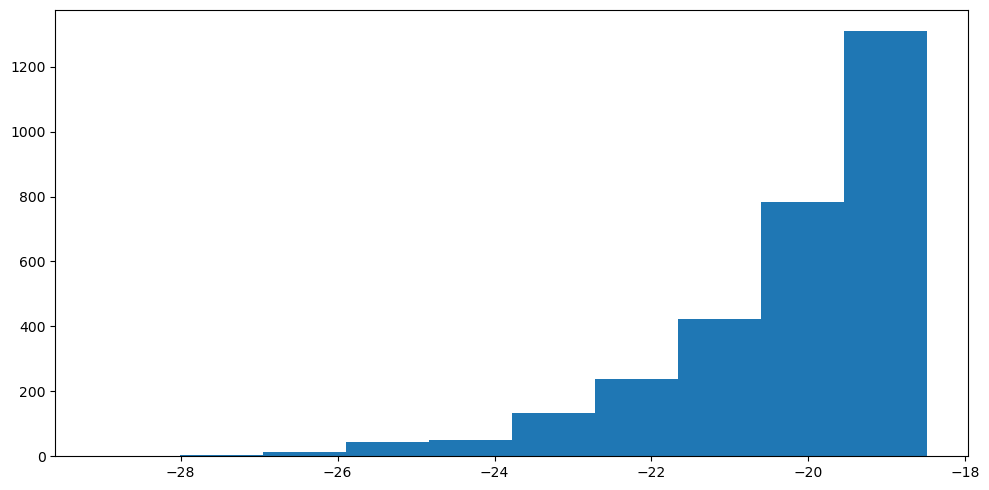

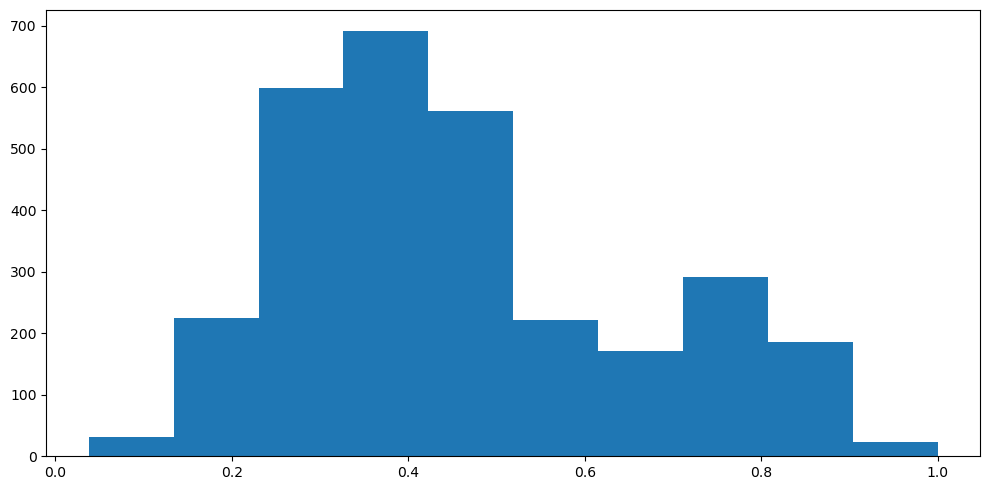

In [1]:
from Doana import analysis
pklfile = "/home/yzhang/Documents/Teachings/Tim_Ruth/PaIVKLkS/PaIVKLkS_SEEDdock.pkl"
reader = analysis.PLIFRead_Dock(pklfile)
fig, ax  = reader.Docking_prolif(sel_cols="top")

reader.show_cols()
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata, -10)
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata, -3)


# Filter poses 

In [7]:
# Date selection reader.fpdata non-hydrophobic interactions, reader.fpdata2 hydrophobic interactions
datasel = reader.fpdata

# Setup the column indexes
score_column = len(datasel.columns)-10; 
seed_vdw_column = len(datasel.columns)-9; 
rank_column = len(datasel.columns)-11; 
OI_avg_column    = len(datasel.columns)-3; 
OI_ref_column    = len(datasel.columns)-2; 
print(f"Selected columns: {rank_column} {datasel.columns[rank_column][0]}, {seed_vdw_column} {datasel.columns[seed_vdw_column][0]}, {OI_ref_column} {datasel.columns[OI_ref_column][0]}")

# Apply filters 
HBstate  = reader.HBondFilter("ge", 1); 
Sstate   = reader.colFilter(reader.fpdata, score_column, "lt", -20); 
Rstate   = reader.colFilter(reader.fpdata, rank_column, "lt", 1000); 
OIstate  = reader.colFilter(reader.fpdata, OI_ref_column, "gt", 0.7); 
FPstate  = reader.FPSelectionFilter(reader.fpdata, [0,13,11], operator="or"); 

# Combine different filters
filters_states  = [HBstate, Sstate, Rstate, OIstate, FPstate]; 

intersec = reader.getIntersection(*filters_states); 
posids   = reader.getPOSIDByStatus(intersec); 
reader.getPOSIDQuery(posids); 
# print(posids)

Selected columns: 31 Rank, 33 seed_vdw, 40 OI_ref
Hydrogen Bond Count Selector: 1988 poses are kept
Column Value Selector: 1302 poses are kept
Column Value Selector: 998 poses are kept
Column Value Selector: 563 poses are kept
Fingerprint Selector: Using and operator, the poses are kept if they have any of defined fingerprint.
Fingerprint Selector: 1743 poses are kept
Intersection Operator: Source from 5 datasets, 184 poses are kept


'pos_id in (10174248,10188195,10161910,10154061,10152731,10202830,10150146,10196911,10186711,10197634,10167036,10152297,10150500,10202436,10188610,10194310,10204207,10189330,10186064,10163020,10190585,10187075,10157767,10172284,10202836,10187606,10201522,10157275,10155546,10166850,10167983,10176004,10167234,10204129,10195413,10208038,10169423,10178341,10180217,10152710,10164730,10176940,10162304,10182714,10177663,10182373,10175944,10204957,10202374,10182509,10161800,10163570,10185513,10157625,10197438,10167032,10207936,10173903,10170427,10194773,10194793,10168231,10204585,10207961,10184470,10182214,10205067,10207794,10164376,10204770,10208464,10191660,10156576,10155496,10208233,10175621,10193806,10206821,10175847,10207235,10162929,10163195,10159680,10172969,10173119,10200319,10186796,10172434,10174879,10183313,10157870,10153714,10184213,10159063,10176888,10170419,10170768,10200164,10157375,10182103,10200080,10171815,10155931,10169959,10192372,10202780,10200297,10188133,10183246,1015023